<a href="https://colab.research.google.com/github/kr-pushpam/Data-Mining-Assignment/blob/main/Data_Mining_Assignment_01_Solution_01_ver2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Question 1: Develop a one dimensional example to demonstrate how bias variance tradeoff occurs with different model complexities using synthetic data.**


---





**Interpretation of the Question**:

The task is to create a clear and illustrative example using simulated data (synthetic data) to demonstrate how different levels of model complexity affect prediction errors. The idea is to demonstrate with examples that how simpler models might miss important patterns (high bias) and how overly complex models might focus too much on the details of the training data (high variance), ultimately leading to poor performance on new, unseen data (overfitting).

The term "one-dimensional" in this context refers to single input variable (feature) in the data, making it easier to visualize and understand the impact of model complexity on prediction accuracy.

# **Response:**

---

The **bias-variance tradeoff** is an important idea in machine learning that shows the balance between how complex a model is Vs how accurate its predictions are.In the bias-variance tradeoff, the overall prediction error is often measured using Mean Squared Error (MSE), which can be decomposed as follows:

**MSE = Bias^2 + Variance + Irreducible Error**

Let’s break down the significance of this equation in the context of model selection and performance:

*   **Mean Squared Error (MSE):**
The MSE is a common metric used to evaluate the accuracy of a model’s predictions. It measures the average squared difference between the predicted values and the actual values. A lower MSE indicates a model that better fits the data.

*   **Bias² (Squared Bias):**
Bias reflects the error due to the model’s assumptions being too simple. For instance, a linear model might assume that the relationship between the input and output is a straight line, even when the true relationship is more complex. The Bias² term quantifies this systematic error.

  **Significance in Tradeoff**: As model complexity increases, Bias² typically decreases because the model becomes more capable of capturing complex patterns. However, reducing Bias² too much (by increasing model complexity) can lead to an increase in variance, thus illustrating the tradeoff.

*   **Variance**:
Variance refers to the model’s sensitivity to small changes in the training data. High variance indicates that the model is too finely tuned to the specific training data, capturing noise as if it were a true pattern.

  **Significance in Tradeoff:** As model complexity increases, variance typically increases. This is because more complex models are better at fitting the training data, including its noise, which can lead to overfitting. The tradeoff occurs because reducing Bias² (by making the model more complex) tends to increase variance.

*   **Irreducible Error:**
The irreducible error represents the noise inherent in the data itself, which cannot be eliminated by any model, no matter how complex. It accounts for the variability in the data that is not due to the relationship between the input and output variables.

  **Significance in Tradeoff**: The irreducible error is beyond the control of the model, and it sets a lower bound on the MSE. The focus in model selection is to minimize the sum of Bias² and Variance, as the irreducible error is fixed.

In summary, the equation,

**MSE = Bias^2 + Variance + Irreducible Error**

encapsulates the fundamental tradeoff in model selection. It highlights the need to balance bias and variance to achieve the best predictive performance, ensuring that the model is neither too simple nor too complex, thereby optimizing the Mean Squared Error.



In order to demostrate this, we will taking took following approch.

1.   **Generate Synthetic Data** : A one-dimensional dataset is fabricated using a sine function with some added noise to mimic real-world data. This will give a clear case where the actual pattern is known, making it easier to show how the model behaves.

2.   **Fit Models of Varying Complexities** : Three models with different levels of complexity will be fitted to the data i.e.
  *   Simple linear regression (low complexity, high bias)
  *   Moderate-degree polynomial regression (balanced bias and variance)
  *   High-degree polynomial regression (high complexity, low bias, high variance)

 This is to show how the complexity of the model affects its fitness the data.

3.   **Calculate Bias, Variance, and MSE** : For each model, the bias, variance, and MSE will be calculated. Aim would to present through these measurements the models' performance, showing how simpler models often underfit (high bias) and more complex models tend to overfit (high variance)

4.   **Plot and Analyse the Outcomes**: The outcomes will be shown using plots of bias, variance, and MSE for each model. Commentary will be given to back up the findings, confirming the bias-variance trade-off theory and stressing the need to choose the right model complexity for the best results.


**Step 1: Generate Synthetic Data** : A one-dimensional dataset is created using a sine function with added noise to simulate real-world data.
  *   True Function:  y = sin(2x)
  *   Generated Data (synthetic) : y = sin(2x) + noise

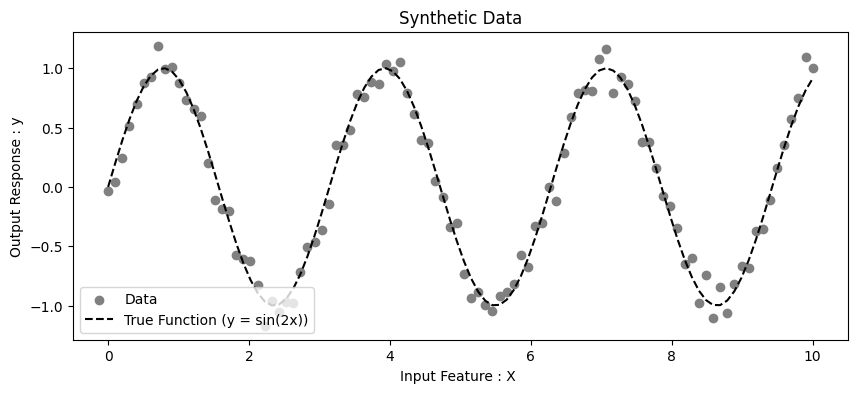

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(33)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(2 * X).ravel() + np.random.normal(scale=0.1, size=X.shape[0])

# Plot
plt.figure(figsize=(10, 4))
plt.scatter(X, y, color='grey', label='Data')
plt.plot(X, np.sin(2 * X), color='black',linestyle='--', label='True Function (y = sin(2x))')
plt.title('Synthetic Data')
plt.xlabel('Input Feature : X ')
plt.ylabel('Output Response : y')
plt.legend(loc = 'lower left')
plt.show()


  **Commentary**:
  *   The plot shows the true underlying function (red line) and the noisy data points (blue scatter).

**Step2: Fit Models of Varying Complexities**: Three models are fitted with increasing complexity:


1.   **Simple Linear Regression**: A model expected to have Low on Complexity and High on Bias
2.   **Moderate-Degree Polynomial Regression (Degree 4)**: Balanced Bias and Variance
3.   **High-Degree Polynomial Regression (Degree 15)**: High Complexity, High Variance


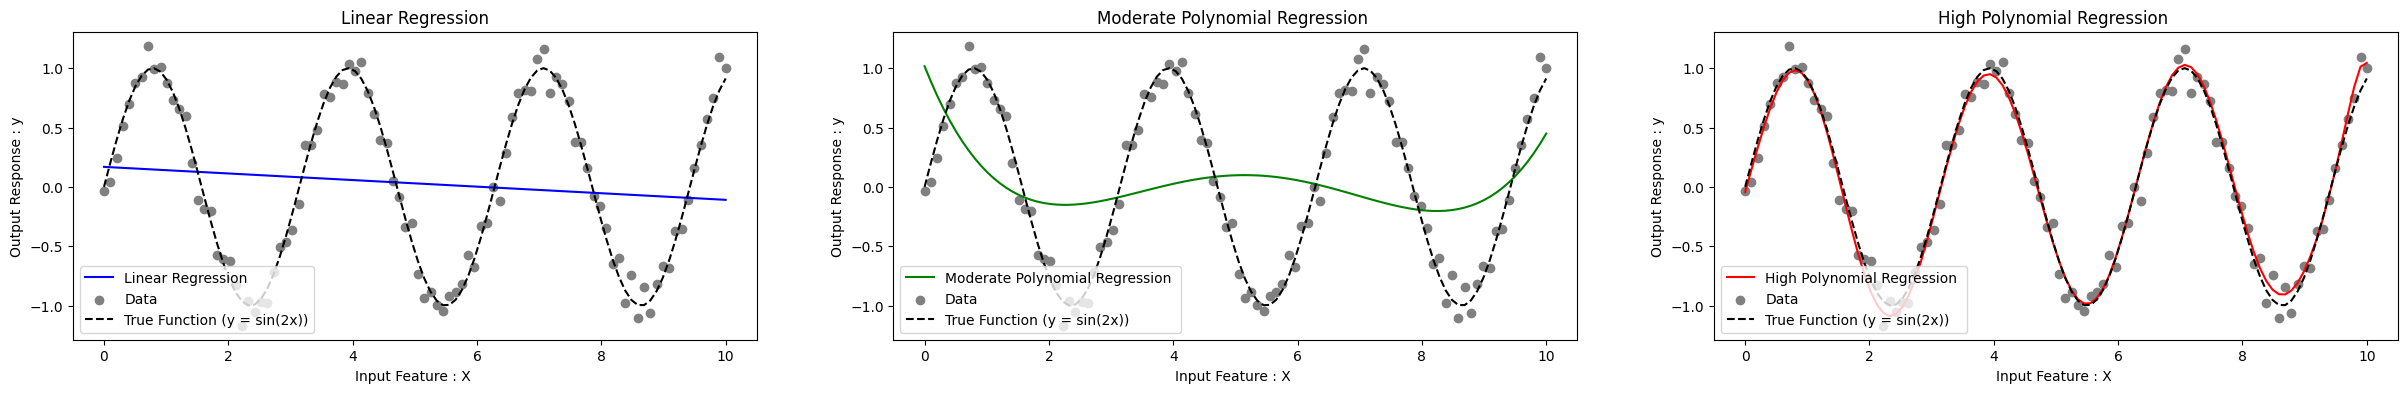

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Define models with different complexities
models = [
    ("Linear Regression", make_pipeline(PolynomialFeatures(degree=1), LinearRegression()),'blue'),
    ("Moderate Polynomial Regression ", make_pipeline(PolynomialFeatures(degree=4), LinearRegression()), 'green'),
    ("High Polynomial Regression ", make_pipeline(PolynomialFeatures(degree=15), LinearRegression()), 'red')
]

# Plot each model's predictions
plt.figure(figsize=(30, 4))
for i, (name, model, color) in enumerate(models):
    #Train the model
    model.fit(X, y)
    y_pred = model.predict(X)

    plt.subplot(1, 3, i+1)
    plt.plot(X, y_pred, color=color, label=f'{name}')
    plt.title(name)
    plt.scatter(X, y, color='grey', label='Data')
    plt.plot(X, np.sin(2 * X), color='black',linestyle='--', label='True Function (y = sin(2x))')
    plt.xlabel('Input Feature : X ')
    plt.ylabel('Output Response : y')
    plt.legend(loc = 'lower left')

plt.show()


**Commentary:**
  *   **Linear Regression**: A simple model that assumes a straight-line relationship between X and  𝑦. It underfits the data, evident by its inability to capture the non-linear pattern.
  *   **Moderate Polynomial Regression** (Degree 4): A more complex model that captures the data pattern better (2nd plot), providing a good balance between bias and variance.
  *   **High Polynomial Regression** (Degree 15): A highly complex model that fits the training data very closely (3rd plot), including noise, indicating overfitting.


**Step 3 & 4: Calculate Bias, Variance, and MSE**: Next,  we calculated the bias, variance, and Mean Squared Error (MSE) for each model to quantify their performance.

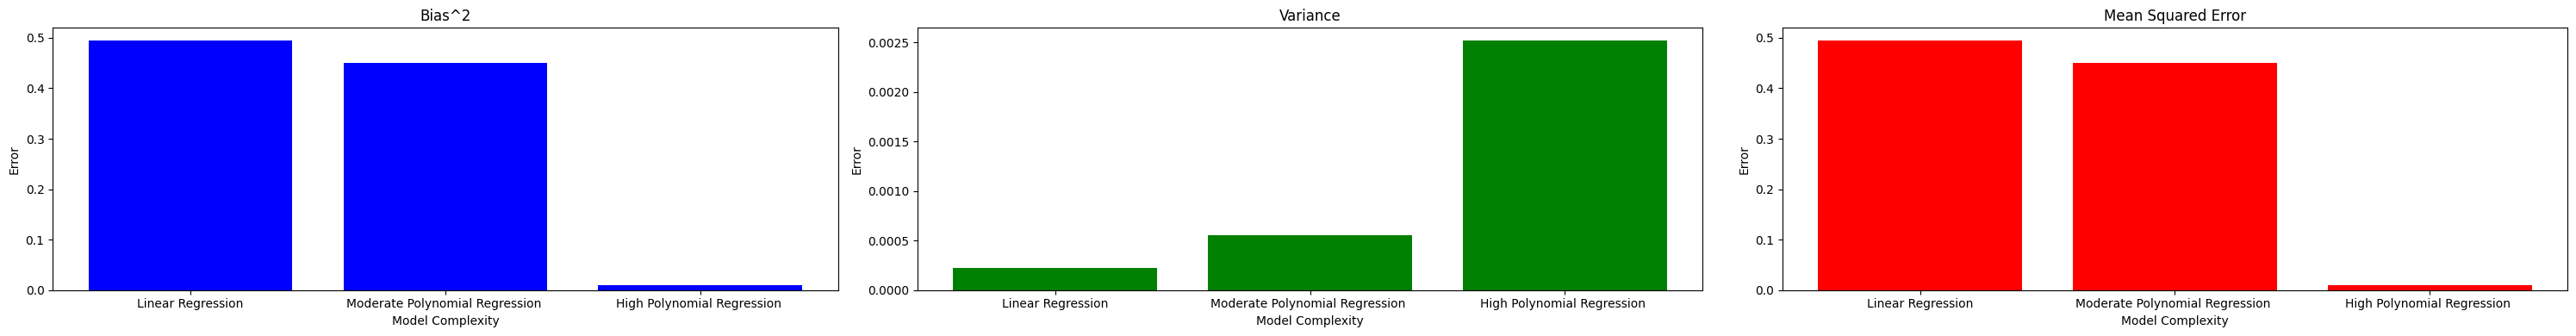

In [27]:
from sklearn.metrics import mean_squared_error

# Function to calculate bias and variance
def calculate_bias_variance(model, X, y, n_simulations=100):
    predictions = np.zeros((n_simulations, len(X)))
    for i in range(n_simulations):
        y_sim = y + np.random.normal(scale=0.1, size=len(y))
        model.fit(X, y_sim)
        predictions[i] = model.predict(X)

    avg_prediction = np.mean(predictions, axis=0)
    bias = np.mean((avg_prediction - y) ** 2)
    variance = np.mean(np.var(predictions, axis=0))

    return bias, variance

# Store results for plotting
biases = []
variances = []
mses = []
model_names = []

# Calculate and store Bias, Variance, and MSE for each model
for name, model, color in models:
    model.fit(X, y)
    y_pred = model.predict(X)

    mse = mean_squared_error(y, y_pred)
    bias, variance = calculate_bias_variance(model, X, y)

    biases.append(bias)
    variances.append(variance)
    mses.append(mse)
    model_names.append(name)

# Plot Bias, Variance, and MSE
plt.figure(figsize=(30, 4))

# Plot Bias^2
plt.subplot(1, 3, 1)
plt.bar(model_names, biases, color='blue')
plt.title('Bias^2')
plt.ylabel('Error')
plt.xlabel('Model Complexity')

# Plot Variance
plt.subplot(1, 3, 2)
plt.bar(model_names, variances, color='green')
plt.title('Variance')
plt.ylabel('Error')
plt.xlabel('Model Complexity')

# Plot MSE
plt.subplot(1, 3, 3)
plt.bar(model_names, mses, color='red')
plt.title('Mean Squared Error')
plt.ylabel('Error')
plt.xlabel('Model Complexity')

plt.tight_layout()
plt.show()


  **Commentry**:

  *  **Bias^2 Plot**:
      *  ***Observation***: Bias is highest for the Linear Regression model, moderate for the Degree 4 Polynomial model, and lowest for the Degree 15 Polynomial model.
      *  ***Commentary***: As model complexity increases, the bias decreases because the model becomes more flexible and better able to capture the underlying pattern in the data. However, low bias alone doesn’t guarantee good generalization.

  *  **Variance Plot**:

    *  ***Observation***: Variance is lowest for the Linear Regression model, moderate for the Degree 4 Polynomial model, and highest for the Degree 15 Polynomial model.
    *  ***Commentary***: As model complexity increases, the variance increases, indicating the model’s increased sensitivity to fluctuations in the training data. The high variance in the Degree 15 Polynomial model suggests overfitting.

  *  **Mean Squared Error Plot**:

    *  ***Observation***: MSE is highest for the Linear Regression model, lower for the Degree 4 Polynomial model, and lowest for the Degree 15 Polynomial model.
    *  ***Commentary***: While the Degree 15 Polynomial model shows the lowest MSE on the training data, its high variance suggests that it may not generalize well to new data, indicative of overfitting.

# **Conclusion**

**Linear Regression** (Low Complexity): Exhibits **high bias** and **low variance**, leading to underfitting. The model's simplicity fails to capture the complex, non-linear relationship in the data. This is also an indication of **underfitting**.

**Moderate Polynomial** Regression (Degree 4): **Balances bias and variance effectively**, resulting in good generalization. This model captures the underlying pattern in the data without overfitting, as reflected by its moderate MSE.

**High Polynomial Regression** (Degree 15): While this model has **low bias**, the **high variance **indicates **overfitting**. The model fits the training data too closely, including noise, which can result in poor performance on new, unseen data. This is evident from the low training MSE but potentially higher MSE on test data.

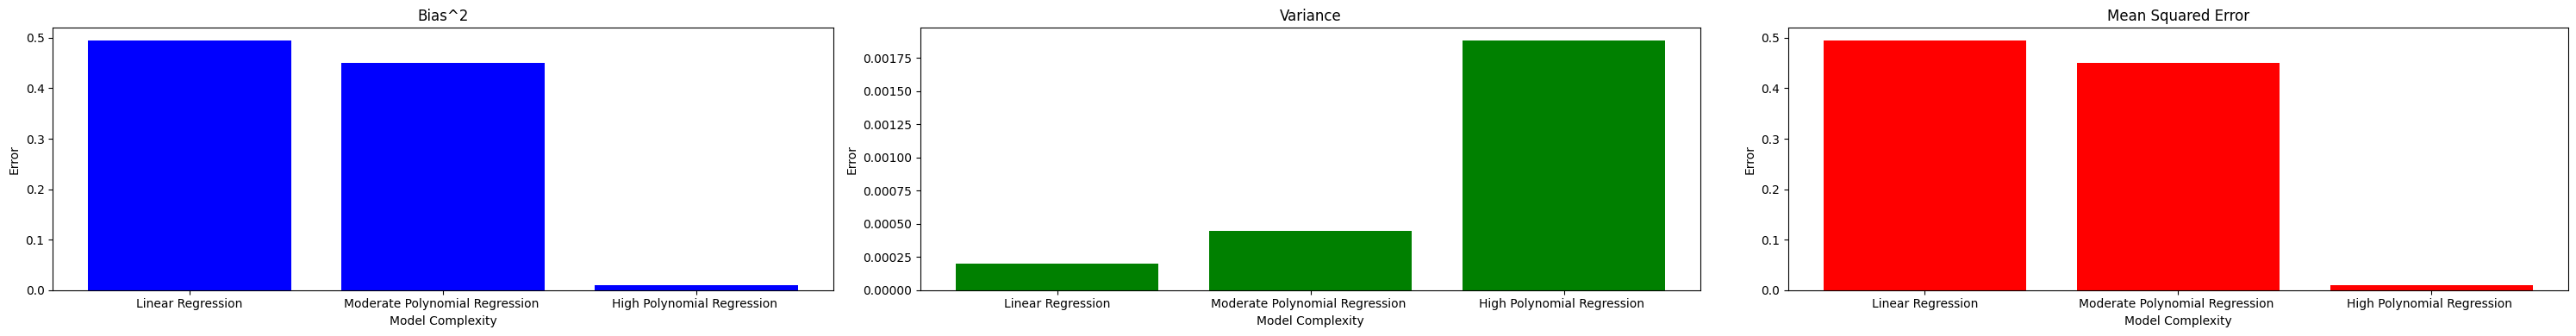

In [28]:
from sklearn.metrics import mean_squared_error

# Function to calculate bias and variance
def calculate_bias_variance(model, X, y, n_simulations=100):
    predictions = np.zeros((n_simulations, len(X)))
    for i in range(n_simulations):
        y_sim = y + np.random.normal(scale=0.1, size=len(y))
        model.fit(X, y_sim)
        predictions[i] = model.predict(X)

    avg_prediction = np.mean(predictions, axis=0)
    bias = np.mean((avg_prediction - y) ** 2)
    variance = np.mean(np.var(predictions, axis=0))

    return bias, variance

# Store results for plotting
biases = []
variances = []
mses = []
model_names = []
model_complexities = []

# Calculate and store Bias, Variance, and MSE for each model
for name, model, color in models:
    model.fit(X, y)
    y_pred = model.predict(X)

    mse = mean_squared_error(y, y_pred)
    bias, variance = calculate_bias_variance(model, X, y)

    biases.append(bias)
    variances.append(variance)
    mses.append(mse)
    model_names.append(name)

    # Assuming model complexity corresponds to the polynomial degree or a similar measure
    if "PolynomialFeatures" in str(model):
        complexity = model.named_steps['polynomialfeatures'].degree
    else:
        complexity = 1  # Linear regression model, simplest complexity
    model_complexities.append(complexity)


# Plot Bias, Variance, and MSE
plt.figure(figsize=(30, 4))

# Plot Bias^2
plt.subplot(1, 3, 1)
plt.bar(model_names, biases, color='blue')
plt.title('Bias^2')
plt.ylabel('Error')
plt.xlabel('Model Complexity')

# Plot Variance
plt.subplot(1, 3, 2)
plt.bar(model_names, variances, color='green')
plt.title('Variance')
plt.ylabel('Error')
plt.xlabel('Model Complexity')

# Plot MSE
plt.subplot(1, 3, 3)
plt.bar(model_names, mses, color='red')
plt.title('Mean Squared Error')
plt.ylabel('Error')
plt.xlabel('Model Complexity')

plt.tight_layout()
plt.show()


In [29]:
model_complexities = np.array(model_complexities)
print(model_complexities)

[ 1  4 15]


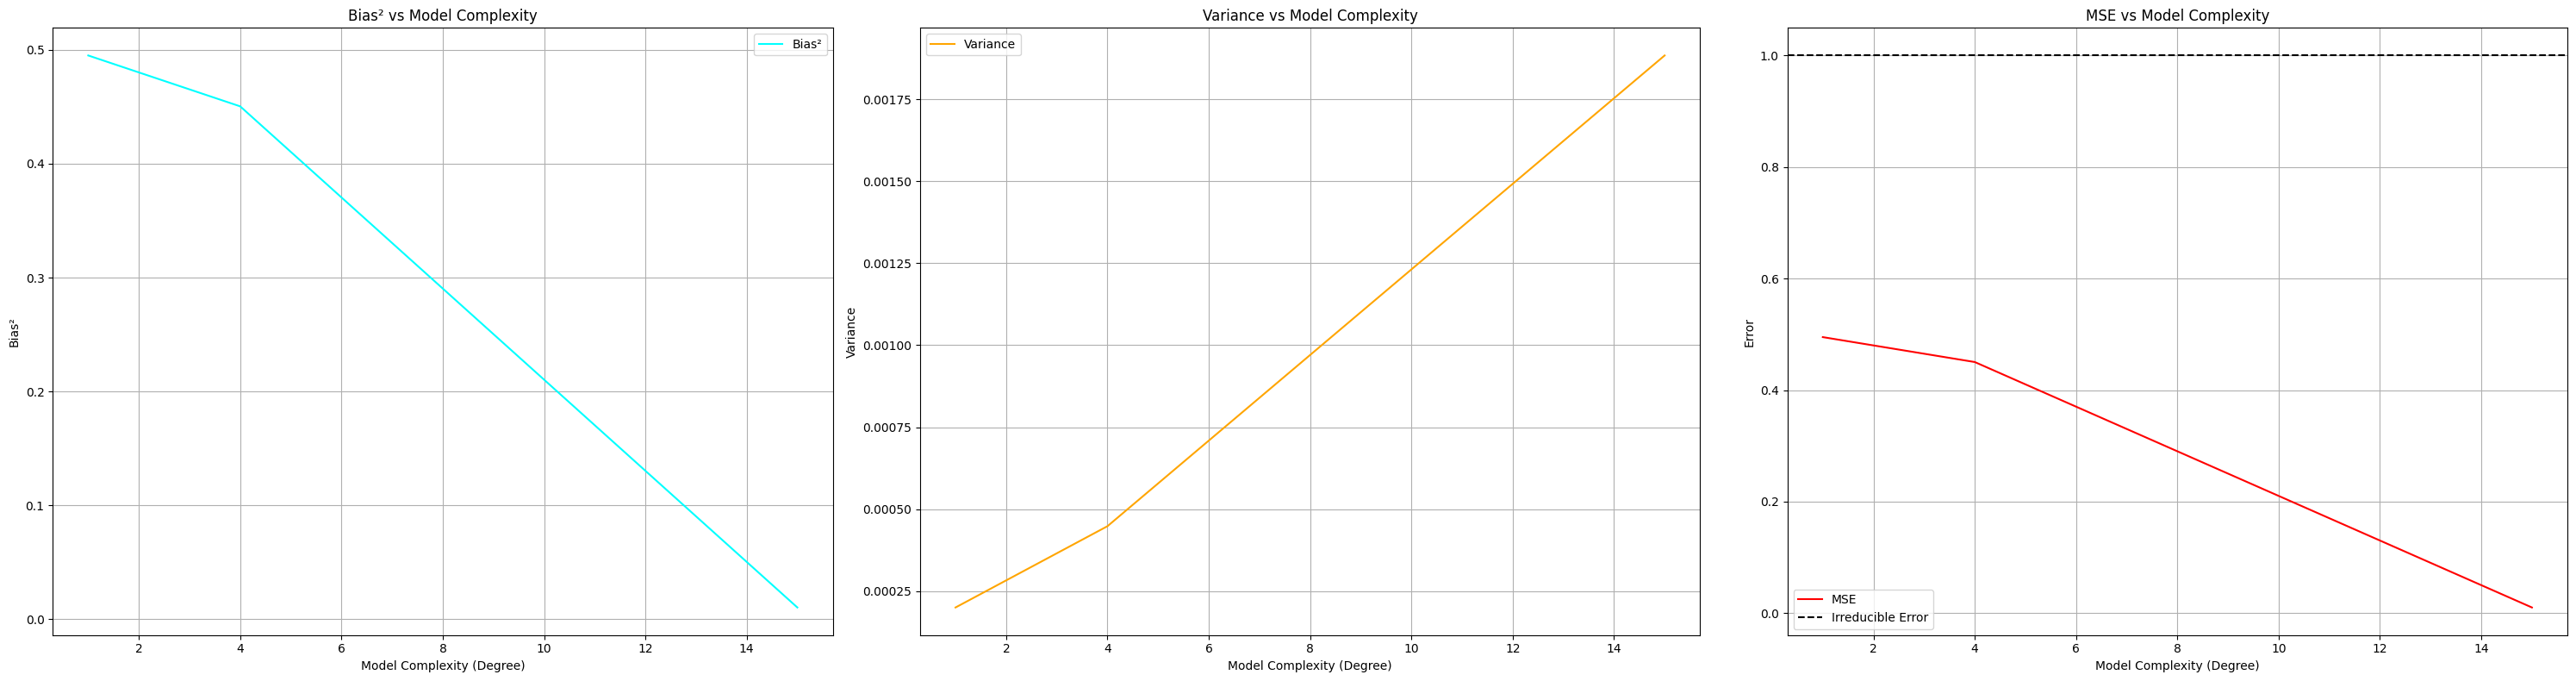

In [30]:
# Convert lists to numpy arrays for plotting
model_complexities = np.array(model_complexities)
biases = np.array(biases)
variances = np.array(variances)
mses = np.array(mses)

# Plot Bias^2, Variance, and MSE as a function of model complexity
plt.figure(figsize=(30,8))

# Plot Bias^2
plt.subplot(1, 3, 1)
plt.plot(model_complexities, biases, color='cyan', label='Bias²')
plt.title('Bias² vs Model Complexity')
plt.xlabel('Model Complexity (Degree)')
plt.ylabel("Bias²")
plt.grid(True)
plt.legend()

# Plot Variance
plt.subplot(1, 3, 2)
plt.plot(model_complexities, variances, color='orange', label='Variance')
plt.title('Variance vs Model Complexity')
plt.xlabel('Model Complexity (Degree)')
plt.ylabel('Variance')
plt.grid(True)
plt.legend()

# Plot MSE
plt.subplot(1, 3, 3)
plt.plot(model_complexities, mses, color='red', label='MSE')
plt.axhline(y=1.0, color='black', linestyle='--', label='Irreducible Error')  # Assuming irreducible error is constant and 1.0
plt.title('MSE vs Model Complexity')
plt.xlabel('Model Complexity (Degree)')
plt.ylabel('Error')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()